In [1]:
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
jtplot.style()

model_dir = 'saved_models/12_custom_models/'

So far we have used tf.keras mainly. That is usually enough for 95% of time, however if you need to dive deeper, you can use Tensorflow's lower level API.

# A quick tour of Tensorflow

Below are some characteristics of the TensorFlow API:

- Its core is very similar to Numpy, but with GPU support
- Supports distributed computing
- Its compiler allows for optimization of computing speed and memory usage. It works by extracting the *computation graph* from a Python function then optimizing it, and finally running it.
- Computation graphs are portable, meaning you can train models in one environment (e.g Python) and run it in another (e.g. Java or Android)
- Implements autodiff and provides excellent standard optimizers such as RMSPROP and Nadam

It also has features for loading and preprocessing data (tf.data, tf.io), image processing (tf.image), signal processing (tf.signal) and more.

TensorFlow is at the center of an extensive ecosystem of libraries. TensorBoard allows for vizualization, TensorFlow Extended (TFX) is a set of libraries built to productionize TensorFlow Projects, including tools for data validation, preprocessing, model analysis and serving. TensorFlow Hub provides a way to download and share pretrained neural networks. Finally you can check [TensorFlow Resources](https://www.tensorflow.org/resources) and this [github pages](https://github.com/jtoy/awesome-tensorflow) for more TensorFlow-based projects. 

# Using TensorFlow like Numpy

A tensor is usually a multidimensional array (just like numpy's ndarray), but it can also hold a scalar.

### Tensors and Operations

Use ```tf.constant()``` to create a tensor

In [2]:
import tensorflow as tf

In [3]:
t = tf.constant([[1., 2., 3.], [4., 5., 6.]])
t

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)>

In [4]:
tf.constant(42)

<tf.Tensor: shape=(), dtype=int32, numpy=42>

In [5]:
t.shape

TensorShape([2, 3])

In [6]:
t.dtype

tf.float32

Indexing is the same as Numpy

In [7]:
t[:, 1:]

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[2., 3.],
       [5., 6.]], dtype=float32)>

In [8]:
t[..., 1, tf.newaxis]

<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[2.],
       [5.]], dtype=float32)>

In [9]:
tf.square(t)

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[ 1.,  4.,  9.],
       [16., 25., 36.]], dtype=float32)>

In [10]:
t + 10

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[11., 12., 13.],
       [14., 15., 16.]], dtype=float32)>

Use the @ to perform matrix multiplication

In [11]:
t @ tf.transpose(t)

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[14., 32.],
       [32., 77.]], dtype=float32)>

In [12]:

tf.linalg.matmul(t, tf.transpose(t))

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[14., 32.],
       [32., 77.]], dtype=float32)>

You will find all basic math operations and most numpy operations in TensorFlow. Some might have a different name (e.g. np.mean() = tf.reduce_mean()). When the name differs, there is a good reason for it. For example for tf.reduce_sum(), the GPU implementation does not guarantee the order in which elements are added, so for 32-bit floats the result may change ever so slightly.

### Tensors and NumPy

You can create a tensor from a numpu array and vice versa. You can even apply TF operations to a numpy array and numpy operations to tensors

In [13]:
import numpy as np

a = np.array([2., 4., 5.])
tf.constant(a)

<tf.Tensor: shape=(3,), dtype=float64, numpy=array([2., 4., 5.])>

In [14]:
t.numpy()

array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)

In [15]:
tf.square(a)

<tf.Tensor: shape=(3,), dtype=float64, numpy=array([ 4., 16., 25.])>

In [16]:
np.square(t)

array([[ 1.,  4.,  9.],
       [16., 25., 36.]], dtype=float32)

Note that NumPy uses 64-bit precision by default while TensorFlow uses 32-bit. This is because 32-bit is generally more than enough for Neural Nets and it runs faster while using less RAM. When you create a tensor from a NumPy array, set ```dtype=float32```

### Type conversions

TensorFlow does not execute automatic type conversions. It raises an exception if you try to execute an operation on tensors with incompatible types. For example you cannot add a float tensor and an integer tensor, nor add a 32-bit float and a 64-bit float.

In [17]:
try: 
    tf.constant(2.) + tf.constant(40)
except Exception as e:
    print(e)

cannot compute AddV2 as input #1(zero-based) was expected to be a float tensor but is a int32 tensor [Op:AddV2]


You can use tf.cast if you really need to convert types

In [18]:
tf.constant(2.) + tf.cast(tf.constant(40), tf.float32)

<tf.Tensor: shape=(), dtype=float32, numpy=42.0>

### Variables

```tf.Tensor``` values we have seen so far are immutable. Thus we cannot use regular tensors to implement weights in a NN since they need to be tweaked by backpropagation. For this we can use ```tf.Variable```

In [19]:
v = tf.Variable([[1., 2., 3.], [4., 5., 6.]])
v

<tf.Variable 'Variable:0' shape=(2, 3) dtype=float32, numpy=
array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)>

Variables can be modified using the ```assign()``` method

In [20]:
v.assign(2 + v)

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[3., 4., 5.],
       [6., 7., 8.]], dtype=float32)>

In [21]:
v

<tf.Variable 'Variable:0' shape=(2, 3) dtype=float32, numpy=
array([[3., 4., 5.],
       [6., 7., 8.]], dtype=float32)>

### Other Data Structures

Some of the other structures available are

*Sparse tensors* (tf.SparseTensor)

Efficiently represent tensors containing mostly zeros. tf.sparse contains operations for these tensors

*Tensor Arrays* (tf.TensorArray)

Lists of tensors. Have fixed size by default but can optionally be made dynamic. All tensors they contain must have the same shape and data type

*Ragged tensors* (tf.RaggedTensor)

Static lists of tensors, where every tensor has the same shape and data type. 

*String tensors*

Regular tensors of type tf.string. These are byte strings, not unicode strings. Creating a tensor using a Unicode string automatically converts them to UTF-8. 

*Sets*

Are represented as regular (or sparse) tensors. For example ```tf.constant([[1,2], [3,4]])``` represents the two sets {1,2} and {3,4}. 

*Queues*

Store tensors across multiple steps. TensorFlow offers various kinds of queues: FIFO, PriorityQueues, RandomShuffleQueue) and batch items of different shapes by padding (PaddingFIFOQueue)

## Customizing Models and Training Algorithms

### Custom loss functions

For the next example, let's suppose we want to create a regression model but the training set is noisy. If we use MSE as the loss functions, we will penalize large errors too much causing the model to be imprecise. Mean Absolute error fixes that but the model might take a while to converge and the trained model might not be very precise. 

We propose using the Huber loss (introduced in chapter 10). It is not implemented in Keras by default but it is in tf. keras, we can use ```keras.losses.Huber```. Let's pretend it is not implemeted and create our own Huber loss.

In [22]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target.reshape(-1, 1), random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

In [23]:
X_train_scaled.shape

(11610, 8)

In [24]:
def huber_fn(y_true, y_pred):
    error = y_true - y_pred
    is_small_error = tf.abs(error) < 1
    squared_loss = tf.square(error)/2
    linear_loss = tf.abs(error) - 0.5
    return tf.where(is_small_error, squared_loss, linear_loss)

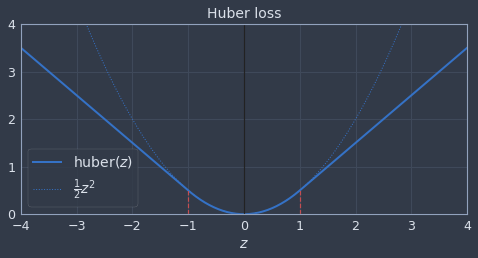

In [25]:
plt.figure(figsize=(8, 3.5))
z = np.linspace(-4, 4, 200)
plt.plot(z, huber_fn(0, z), "b-", linewidth=2, label="huber($z$)")
plt.plot(z, z**2 / 2, "b:", linewidth=1, label=r"$\frac{1}{2}z^2$")
plt.plot([-1, -1], [0, huber_fn(0., -1.)], "r--")
plt.plot([1, 1], [0, huber_fn(0., 1.)], "r--")
plt.gca().axhline(y=0, color='k')
plt.gca().axvline(x=0, color='k')
plt.axis([-4, 4, 0, 4])
plt.grid(True)
plt.xlabel("$z$")
plt.legend(fontsize=14)
plt.title("Huber loss", fontsize=14)
plt.show()

We can now use this loss when creating and compiling a model:

In [26]:
input_shape = X_train.shape[1:]

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(30, activation="selu", kernel_initializer="lecun_normal",
                       input_shape=input_shape),
    tf.keras.layers.Dense(1),
])

model.compile(loss=huber_fn, optimizer='nadam', metrics=['mae'])

model.fit(X_train_scaled, y_train, epochs=2, validation_data=(X_valid_scaled, y_valid))
model.save(model_dir + 'my_model_with_custom_loss.h5')

Epoch 1/2
363/363 [==============================] - 1s 2ms/step - loss: 0.5612 - mae: 0.9172 - val_loss: 0.3074 - val_mae: 0.5954
Epoch 2/2
363/363 [==============================] - 0s 1ms/step - loss: 0.2103 - mae: 0.5022 - val_loss: 0.2643 - val_mae: 0.5473


But what happens to the loss when we save and load up the model?

### Saving and Loading Models with Custom Components

When loading a model containing a custom object (such as a function), we need to map the names to the objects using a dictionary

In [27]:
model = tf.keras.models.load_model(model_dir + 'my_model_with_custom_loss.h5', 
                                   custom_objects={'huber_fn':huber_fn})

The above implementation of the huber function has the threshold $\delta$ automatically set to 1, what if we want to add a custome threshold? If we use the method above, saving the model does not change the threshold. We can solve this by creating a subclass of ther keras.losses.Loss class and implementing the ```get_config()``` method

In [28]:
class HuberLoss(tf.keras.losses.Loss):
    def __init__(self, threshold=1.0, **kwargs):
        self.threshold = threshold
        super().__init__(**kwargs)
        
    def call(self, y_true, y_pred):
        error = y_true - y_pred
        is_small_error = tf.abs(error) < self.threshold
        squared_loss = tf.square(error) / 2
        linear_loss  = self.threshold * tf.abs(error) - self.threshold**2 / 2
        return tf.where(is_small_error, squared_loss, linear_loss)
    
    def get_config(self):
        base_config = super().get_config()
        return {**base_config, "threshold": self.threshold}

We can then use an instance of this class when compiling

In [29]:
model.compile(loss=HuberLoss(threshold=2.), optimizer='nadam', metrics=['mae'])

model.fit(X_train_scaled, y_train, epochs=2, validation_data=(X_valid_scaled, y_valid))
model.save(model_dir + 'my_model_with_custom_loss_class.h5')

Epoch 1/2
363/363 [==============================] - 1s 1ms/step - loss: 0.2318 - mae: 0.4960 - val_loss: 0.2923 - val_mae: 0.5115
Epoch 2/2
363/363 [==============================] - 0s 1ms/step - loss: 0.2215 - mae: 0.4859 - val_loss: 0.2308 - val_mae: 0.4779


Then when loading the class we follow the same procedure. 

In [30]:
model = tf.keras.models.load_model(model_dir + 'my_model_with_custom_loss_class.h5', 
                                   custom_objects={'HuberLoss':HuberLoss})

### Custom Activation Functions, Initializers, Regularizers and Constraints

Much of Keras functionality can be customized in a similar manner, you will just need to write a simple function with the appropriate inputs and outputs.

An example of a custom softplus (```keras.activations.softplus()``` or ```tf.nn.softplus()```)

In [31]:
def my_softplus(z):
    return tf.math.log(tf.exp(z) + 1.0)

A custom Glorot Initializer (```keras.initializers.glorot_normal()```)

In [32]:
def my_glorot_initializer(shape, dtype=tf.float32):
    stddev = tf.sqrt(2. / (shape[0] + shape[1]))
    return tf.random.normal(shape, stddev=stddev, dtype=dtype)

A $l_1$ regularizer (```keras.regularizers.l1(0.01)```)

In [33]:
def my_l1_regularizer(weights):
    return tf.reduce_sum(tf.abs(0.01 * weights))

And a custom constraint that ensures all weights are positive (```keras.constraints.nonneg()``` or ```tf.relu()```)

In [34]:
def my_positive_weights(weights):
    return tf.where(weights < 0., tf.zeros_like(weights), weights)

We can now use these to define a layer

In [35]:
layer = tf.keras.layers.Dense(30, activation=my_softplus,
                              kernel_initializer=my_glorot_initializer,
                              kernel_regularizer=my_l1_regularizer,
                              kernel_constraint=my_positive_weights)

If a function has a hyperparameter that needs to be saved with the model, then we need to subclass the appropriate class. For example ```keras.regularizers.Regularizer```

In [36]:
class MyL1Regularizer(tf.keras.regularizers.Regularizer):
    def __init__(self, factor):
        self.factor=factor
    def __call__(self, weights):
        return tf.reduce_sum(tf.abs(self.factor * weights))
    def get_config(self):
        return {'factor':self.factor}

### Custom Metrics

Losses and metrics are conceptually not the same thing; Losses (e.g. cross-entropy) are used by Grad Desc. to *train* a model, hence they need to be smooth and their gradients should not be 0 everywhere. It is also ok if they're not easily interpretable by humans. Metrics on the other hand (e.g. accuracy), are used to *evaluate* a model, they must be easily interpretable and don't have other restrictions.

We can however, use define custom metrics the same way we define a custom loss functions.

When doing so, for each batch during training, keras will compute the metric and keep track of its mean since the beginning of the epoch. Most of the time this is fine, but not always!

For example, if we're considering a binary classifier's precision we don't want this to happen. Suppose the model made five positive prediction in the first batch, four of which were correct (80% precision). Then, suppose the model made three positive predictions in the second batch, but they were incorrect (0% precision). If you compute the mean over the two batches we get 40% precision, but that's **not** right! Indeed, there were a total of four true positives (4+0) out of eight predictions (5+3), so the overall precision is 50%.

We replicate the above example with a slight modification

In [37]:
precision = tf.keras.metrics.Precision()
precision([0, 1, 1, 1, 0, 1, 0, 1], [1, 1, 0, 1, 0, 1, 0, 1])

<tf.Tensor: shape=(), dtype=float32, numpy=0.8>

In [38]:
precision([0, 1, 0, 0, 1, 0, 1, 1], [1, 0, 1, 1, 0, 0, 0, 0])

<tf.Tensor: shape=(), dtype=float32, numpy=0.5>

We create a ```Precision``` objecte and use it like a function, passing the labels and predictions for the first and second batch. The ```Precision``` object created above is a *streaming metric* (or *stateful metric*), it is gradually updated batch after batch.

We can call ```result()``` to get the current value of the metric and look at its variables

In [39]:
precision.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.5>

In [40]:
precision.variables

[<tf.Variable 'true_positives:0' shape=(1,) dtype=float32, numpy=array([4.], dtype=float32)>,
 <tf.Variable 'false_positives:0' shape=(1,) dtype=float32, numpy=array([4.], dtype=float32)>]

To create a streaming metric, we subclass the keras.metrics.Metric class.

In [41]:
def create_huber(threshold=1.0):
    def huber_fn(y_true, y_pred):
        error = y_true - y_pred
        is_small_error = tf.abs(error) < threshold
        squared_loss = tf.square(error) / 2
        linear_loss  = threshold * tf.abs(error) - threshold**2 / 2
        return tf.where(is_small_error, squared_loss, linear_loss)
    return huber_fn

class HuberLoss(tf.keras.metrics.Metric):
    def __init__(self, threshold=1.0, **kwargs):
        super().__init__(**kwargs)
        self.threshold = threshold
        self.huber_fn = create_huber(threshold)
        self.total = self.add_weight('total', initializer='zeros')
        self.count = self.add_weight('count', initializer='zeros')
    def update_state(self, y_true, y_pred, sample_weight=None):
        metric = self.huber_fn(y_true, y_pred)
        self.total.assign_add(tf.reduce_sum(metric))
        self.count.assign_add(tf.cast(tf.size(y_true), tf.float32))
    def result(self):
        return self.total / self.count
    def get_config(self):
        base_config = super().get_config()
        return {**base_config, "threshold": self.threshold}

### Custom Layers

Custom layers can be used to create new exotic layers that do not have a default implementation. They can also be used to simplify the creation of a repetitive architecture, containing identical blocks of layers. For example if the model is a sequence of layers A, B, C, A, B, C, A, B, C, you might want to define a custom layer D containing layers A,B,C. 

To create a a simple layer without weights (such as a ```Flatten()``` layer) you can wrap a function around a keras.layers.Lambda layer.

In [42]:
exponential_layer = tf.keras.layers.Lambda(lambda x: tf.exp(x))

It can be used like any other layer with the Sequential, functional or Subclassing API. You could also use it as an activation layer. 

Let's create an implementation of a Dense Layer:

In [43]:
class MyDense(tf.keras.layers.Layer):
    def __init__(self, units, activation=None, **kwargs):
        super().__init__(**kwargs)
        self.units = units
        self.activation = tf.keras.activations.get(activation)
    
    def build(self, batch_input_shape):
        self.kernel = self.add_weight(
            name='kernel', shape=[batch_input_shape[-1], self.units],
            initializer='glorot_normal')
        self.bias = self.add_weight(
            name='bias', shape=[self.units], initializer='zeros')
        super().build(batch_input_shape) # must be at the end
    
    def call(self, X):
        self.activation(X @ self.kernel + self.bias) # matrix mult
        
    def compute_output_shape(self, batch_input_shape):
        return tf.TensorShape(batch_input_shape.as_list()[:-1] + self.units)
    
    def get_config(self):
        base_config = super().get_config()
        return {**base_config, 'units': self.units,
                'activation':keras.activations.serialize(self.activation)}

For layers with multiple inputs (e.g. concatenate) the argument to the call() method should be a tuple containing all inputs and similarly the argument to the compute_output_shape() method should be a tuple containing each input's batch shape. The following toy layer takes two inputs and returns three outputs.

Note the layer can only be used with the Functional and Subclassing API but not the Sequential(which accepts layers with one input and one output)

In [44]:
class MyMultiLayer(tf.keras.layers.Layer):
    def call(self, X):
        X1, X2 = X
        return [X1 + X2, X1 * X2, X1 / X2]
    def compute_output_shape(self, batch_input_shape):
        b1, b2 = batch_input_shape
        return [b1, b1, b1]

For layers with different behaviour in training and test (e.g. dropout), we need to pass a ```training``` parameter to the call() method and decide what to do. The following layer adds Gaussian noise during training (for regularization) but does nothing during testing (tf.keras.layers.GaussianNoise).

In [45]:
class myGaussianNoise(tf.keras.layers.Layer):
    def __init__(self, stddev, **kwargs):
        super().__init__(**kwargs)
        self.stddev=stddev
        
    def call(self, X, training=None):
        if training:
            noise = tf.random.normal(tf.shape(X), stddev=self.stddev)
            return X + noise
        else:
            return X
    def comput_output_shape(self, batch_input_shape):
        return batch_input_shape

### Custom Models

As an example we will create the model defined in figure 12-3 (pg 395)

The inputs go through a first dense layer then through a *residual block* composed of two dense layers and an addition operation, then through the same residual block three more times, then through a second residual block and the final result goes through a dense output layers. 

Note: this is just an example model. 

Let's start by creating a ResidualBlock Layer


In [46]:
class ResidualBlock(tf.keras.layers.Layer):
    def __init__(self, n_layers, n_neurons, **kwargs):
        super().__init__(**kwargs)
        self.hidden = [tf.keras.layers.Dense(n_neurons, activation='elu',
                                             kernel_initializer='he_normal')
                       for _ in range(n_layers)]
    def call(self, inputs):
        Z = inputs
        for layer in self.hidden:
            Z = layer(Z)
        return inputs + Z

Keras automatically detects that the ```hidden``` attribute contains trackable objects so their variables are automatically added to the layer's list of variables. Now, for the model itself

In [47]:
class ResidualRegressor(tf.keras.Model):
    def __init__(self, output_dim, **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = tf.keras.layers.Dense(30, activation='elu',
                                             kernel_initializer='he_normal')
        self.block1 = ResidualBlock(2, 30)
        self.block2 = ResidualBlock(2, 30)
        self.out = tf.keras.layers.Dense(output_dim)
    
    def call(self, inputs):
        Z = self.hidden1(inputs)
        for _ in range(1 + 3):
            Z = self.block1(Z)
        Z = self.block2(Z)
        return self.out(Z)

This works as any other methods we used previously. If you want to save and load the model you must implement the get_config() methods for both classes.

The model class is a subclass of the Layer class, so models can be defined and used exactly like layers, but model have extra functionality (compile, predict, fit etc..). Note: You could define every layer as a model, since they're (almost) same thing, but it is cleaner to define the internal components of the model (i.e. the layers) from the model itself.

### Losses and Metrics based on Internal Models

The custom losses defined earlier were all based on the labels and predictions. Sometimes, you'll want to define custom losses based on other parts of the model, such as weights or activations of hidden layers. This can be useful for regularization or to monitor internal aspects of the model

To define a custom loss on model internals, compute it based on the part you want it then pass the result to the add_loss() method. 

In the example below we build a custom regression MLP composed of a stack of five hidden layers + output layer. This model will have an auxiliary output on top of the upper hidden layer. The loss associated to this auxiliary output will be called the *reconstruction loss*: the mean squared difference between the reconstruction and the inputs. 

By adding this loss, we encourage the model to preserve as much information as possible through the hidden layers. In practice, this loss sometimes improve generalization.

In [48]:
class ReconstructingRegressor(tf.keras.Model):
    def __init__(self, output_dim, **kwargs):
        super().__init__(*kwargs)
        self.hidden = [tf.keras.layers.Dense(30, activation='elu',
                                            kernel_initializer='lecun_normal')
                       for _ in range(5)]
        self.out = tf.keras.layers.Dense(output_dim)
#         self.reconstruction_mean = tf.keras.metrics.Mean(name='reconstruction_error')
    
    def build(self, batch_input_shape):
        n_inputs = batch_input_shape[-1]
        self.reconstruct = tf.keras.layers.Dense(n_inputs)
        super().build(batch_input_shape)
    
    def call(self, inputs, training=None):
        Z = inputs
        for layer in self.hidden:
            Z = layer(Z)
        reconstruction = self.reconstruct(Z)
        recon_loss = tf.reduce_mean(tf.square(reconstruction - inputs))
        self.add_loss(0.05 * recon_loss)
#         if training:
#             result = self.reconstruction_mean(recon_loss)
#             self.add_metric(result)
        return self.out(Z)        

We build the reconstruct layer at the ```build``` method because the number of units must be equal to the number of input units, which is unknown until this method is called.

We also scale down the reconstruction loss by multiplying it by 0.05 (another hyperparameter you can tune) so that the reconstruction does not dominate the main loss.

We can similarly define a custom metric and add it using the ```add_metric()``` method. We added this as comment in the function above. Note: there's an issue when calling the fit method below. Perhaps revisit this in the future

In [49]:
# model = ReconstructingRegressor(1)
# model.compile(loss="mse", optimizer="nadam")
# history = model.fit(X_train_scaled, y_train, epochs=2)
# y_pred = model.predict(X_test_scaled)

### Computing Gradients using Autodiff

Consider the following function:
$$ f(w_1, w_1) = 3w_1^2 + 2w_1w_2 $$
We can easily compute its partial derivatives by hand and then evaluate it at a certain point, for instance
$$ \frac{\partial f}{\partial w_1} = 6w_1 + 2w_2$$ 
$$ \frac{\partial f}{\partial w_2} = 2w_1$$ 
At the point $(w_1, w_2)=(5,3)$ this equates to (36, 10)

However this doesn't scale for neural networks as there are tens of thousands of parameters. Interestingly, one solution is to compute an approximation of each partial by measuring how much the output changes when you perturbate the function by some epsilon 

In [50]:
def f(w1, w2):
    return 3*w1**2 + 2*w1*w2

w1, w2 = 5, 3
eps = 1e-6
print((f(w1+eps, w2) - f(w1,w2))/eps, (f(w1, w2+eps) - f(w1,w2))/eps)

36.000003007075065 10.000000003174137


Pretty good, but again, this is an approximation, and doesn't scale with a large number of parameters.

With tensorflow we can do as follows

In [51]:
w1, w2 = tf.Variable(5.), tf.Variable(3.)
with tf.GradientTape() as tape:
    z = f(w1, w2)
    
gradients = tape.gradient(z, [w1, w2])
gradients

[<tf.Tensor: shape=(), dtype=float32, numpy=36.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=10.0>]

The GradientTape defines a context to record every operation that involves a variable and then we use the tape to compute the gradient. 

Note: to save memory only put the strict minimum inside the GradientTape block. You can also pause recording with tape.stop_recording inside the block

The tape is also erased after you call its gradient method, so running it again will yield an exception

In [52]:
try:
    tape.gradient(z, [w1, w2])
except RuntimeError:
    print('Tape was already used!')

Tape was already used!


If you need to call gradient more than once you need to make it persistent and delete after use to free resources

In [53]:
with tf.GradientTape(persistent=True) as tape:
    z = f(w1, w2)
    
dz_dw1 = tape.gradient(z, w1)
dz_dw2 = tape.gradient(z, w2)
del tape
print(dz_dw1, dz_dw2)

tf.Tensor(36.0, shape=(), dtype=float32) tf.Tensor(10.0, shape=(), dtype=float32)


By default, the tape only tracks operations involving *variables*. If you try to put anything else the result will be None

In [54]:
c1, c2 = tf.constant(5.), tf.constant(3.)
with tf.GradientTape() as tape:
    z = f(c1, c2)
tape.gradient(z, [c1, c2])

[None, None]

However we can force the tape to watch any tensors to record operations involving them

In [55]:
with tf.GradientTape() as tape:
    tape.watch(c1)
    tape.watch(c2)
    z = f(c1, c2)
tape.gradient(z, [c1, c2])

[<tf.Tensor: shape=(), dtype=float32, numpy=36.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=10.0>]

This can be useful in cases for example if you want to implement a regularization loss that penalizes activations that vary a lot when the inputs vary little: the loss will be based on the gradient of the activations with regard to the inputs. As the inputs are not variables the tape needs to watch them

If you want to stop gradients to stop form brackpropagating through some part of the NN you can use tf.stop_gradient(). It will return its inputs during the forward pass but does not let gradients through backpropagation

In [56]:
def f(w1, w2):
    return 3*w1**2 + tf.stop_gradient(2*w1*w2)

with tf.GradientTape() as tape:
    z = f(w1, w2)
    
tape.gradient(z, [w1, w2])

[<tf.Tensor: shape=(), dtype=float32, numpy=30.0>, None]

Numerical issues can occur when computing gradients, for example the gradients of the my_softplus function for large values yields NaN

In [57]:
x = tf.Variable([100.])
with tf.GradientTape() as tape:
    z = my_softplus(x)
    
tape.gradient(z, [x])

[<tf.Tensor: shape=(1,), dtype=float32, numpy=array([nan], dtype=float32)>]

This is because of floating point arithmetic. To get around this, we can analytically compute the gradient of the softplus $f'(x) = 1/(1+\exp(x))$ and tell TF to use this stable function to comput gradients. We do that by decorating the function with @tf.custom_gradient and returning its normal output and the function that computes the derivatives 

In [58]:
@tf.custom_gradient
def my_better_softplus(z):
    exp = tf.exp(z)
    def my_softplus_gradients(grad):
        return grad / (1 + 1/exp)
    return tf.math.log(exp + 1), my_softplus_gradients

x = tf.Variable([100.])
with tf.GradientTape() as tape:
    z = my_better_softplus(x)
    
tape.gradient(z, [x])

[<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>]

### Custom Training Loops

If we want to implement different fit methods, for example the one described by the Wide & Deep paper, which needs two different optimizers: one for the wide path and other for the deep path. The default fit methods only uses one optimizer, so we need to write our own custom loop. 

You may also wanto to create a custom training loop to feel more confident they do precisely what you intend them to do. This can make you feel safer but it comes at the cost of a longer and harder to maintain codebase. Let's do this as an exercise. We start with a simple model.

In [59]:
l2_reg = tf.keras.regularizers.l2(0.05)
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(30, activation='elu', kernel_initializer='he_normal',
                         kernel_regularizer=l2_reg),
    tf.keras.layers.Dense(1, kernel_regularizer=l2_reg)
])

Next we create a function for randomly sample a batch of instances and a function to display the training status, including number of steps, total number of steps, mean loss since start of epoch and other metrics.

In [60]:
def random_batch(X, y, batch_size=32):
    idx = np.random.randint(len(X), size=batch_size)
    return X[idx], y[idx]

def progress_bar(iteration, total, size=30):
    running = iteration < total
    c = ">" if running else "="
    p = (size - 1) * iteration // total
    fmt = "{{:-{}d}}/{{}} [{{}}]".format(len(str(total)))
    params = [iteration, total, "=" * p + c + "." * (size - p - 1)]
    return fmt.format(*params)

def print_status_bar(iteration, total, loss, metrics=None, size=30):
    metrics = " - ".join(["{}: {:.4f}".format(m.name, m.result())
                         for m in [loss] + (metrics or [])])
    end = "" if iteration < total else "\n"
    print("\r{} - {}".format(progress_bar(iteration, total), metrics), end=end)

Now we can define the necessary hyperparameters

In [61]:
n_epochs = 5
batch_size = 32
n_steps = len(X_train) // batch_size
optimizer = tf.keras.optimizers.Nadam(lr=0.01)
loss_fn = tf.keras.losses.mean_squared_error
mean_loss = tf.keras.metrics.Mean()
metrics = [tf.keras.metrics.MeanAbsoluteError()]

And now for the loop

In [62]:
# Two loops, one for the epochs and another for the batches within each epoch
for epoch in range(1, n_epochs + 1):
    print("Epoch {}/{}".format(epoch, n_epochs))
    for step in range(1, n_steps + 1):
        #start by sampling a batch
        X_batch, y_batch = random_batch(X_train_scaled, y_train)
        
        with tf.GradientTape() as tape:
            y_pred = model(X_batch, training=True) # Make predictions for this batch
            main_loss = tf.reduce_mean(loss_fn(y_batch, y_pred)) # compute loss
            loss = tf.add_n([main_loss] + model.losses) # sum regularization loss to main loss
            
        gradients = tape.gradient(loss, model.trainable_variables) # calculate gradient for trainable vars
        optimizer.apply_gradients(zip(gradients, model.trainable_variables)) # Gradient Descent
        # update loss and print status bar
        mean_loss(loss)
        for metric in metrics:
            metric(y_batch, y_pred)
        print_status_bar(step * batch_size, len(y_train), mean_loss, metrics)
    print(print_status_bar(len(y_train), len(y_train), mean_loss, metrics))
    for metric in [mean_loss] + metrics:
        metric.reset_states()

Epoch 1/5

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

11610/11610 [==============================] - mean: 1.3684 - mean_absolute_error: 0.5845
None
Epoch 2/5
11610/11610 [==============================] - mean: 0.7206 - mean_absolute_error: 0.5327
None
Epoch 3/5
11610/11610 [==============================] - mean: 0.7228 - mean_absolute_error: 0.5342
None
Epoch 4/5
11610/11610 [==============================] - mean: 0.6165 - mean_absolute_error: 0.5064
None
Epoch 5/5
11610/11610 [==============================] - mean: 0.6728 - mean_absolute_er

See pg 405 for more details.

This loop does not handle layers that behave differently (e.g. BatchNormalization or Dropout).
As seen, there's a lot of room to make errors, but you get full control, choose wisely.

### TensorFlow functions and graphs

Let's start by defining a function to cube a number:

In [63]:
def cube(x):
    return x**3

We can pass it numbers as well as tensors

In [64]:
cube(2)

8

In [65]:
cube(tf.constant(2.0))

<tf.Tensor: shape=(), dtype=float32, numpy=8.0>

We can convert this function to a TensorFlow Function by passing it to tf.function. Then it will return tensors instead of primitive values

In [66]:
tf_cube = tf.function(cube)

In [67]:
tf_cube(2)

<tf.Tensor: shape=(), dtype=int32, numpy=8>

In [68]:
@tf.function
def tf_cube(x):
    return x ** 3

In [69]:
tf_cube(2)

<tf.Tensor: shape=(), dtype=int32, numpy=8>

Under the hood, TF optimizes the computation graph, pruning unused nodes, simplifying expressions. As a results, a TF function will usually run much faster than the original Python function, especially for complex computations. Moreover, when you write a custom loss function, metric, layer or any other function, Keras automatically converts it to a TF function.

TF handles polymorphism by genereating a new graph for each unique set of input shapes. For example, calling ```tf_cube(tf.constant(20))``` will generate a graph for int32 tensors of shape []. If you then call ```tf_cube(tf.constant(10))``` the same graph will be re-used. 

If you call ```tf_cube(tf.constant([10,20]))``` a new graph will be generated for int32 inputs of shape [2]. This is only true however, when the inputs are tensors. For example calling ```tf_cube(10)``` and ```tf_cube(20)``` will generate two new graphs.

### AutoGraph and Tracing

See book pg 408 for this

### TF Function Rules

Here are a few rules to respect when creating TF functions

Calls to external libraries (such as numpy and even the standard library) will only happen during tracing. A TF graph can only include TF constructs, so make sure to use tf.reduce_sum() instead of np.sum(), tf.sort() instead of sorted() and so on...

Some implications:
- If you define a TF function that just returns np.random.rand(), a random number will only be generated when the function is traced. This means f(tf.constant(2.)) and f(tf.constant(3.)) will return the same random number, but f(tf.constant([2., 3.])) will return a different one. Instead use tf.random.uniform([]) and a new random number will be generated upon every call, as the operation will be part of the graph.
- If your non-TF function has side effects (e.g. logging or updating a counter), these side effects will not occur every time you call the TF function as they will only occur when the function is traced. 

You can make calls to other Python functions of TF functions but they should follow the same rules, as TF will capture their operations in the computation graph. These functions need not be decorated with @tf.function.

If the function creates a TF variable, it must do so upon the very first call and only then, else you'll get an exceptions. It is better to create variables outside the TF functions (e.g. in the build() method of a custom layer). If you want to assign a new value to the variable, make sure to call its assign() method instead of using the = operator.

TF will only capture for loops that iterate over a tensor or a dataset. So make sure you use ```for i in tf.range(x)```, or the loop will not be captured in the graph. Instead it will run during tracing. (you may want this, if the for loop is meant to build the graph, for example to create each layer in a NN)

As always, vectorized implementations are more efficient than for loops!

In [70]:
tf.range(10)

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32)>

# Exercises

## Exercise 12) Implement a custom layer that performs *layer normalization*
### Guidelines
- The build() method should define two trainable weights $\alpha$ and $\beta$, both of shape input_shape[-1:] and data type float32. $\alpha$ should be initialized with 1s and $\beta$ with 0s
- The call() method should compute the mean $\mu$ and standard deviation $\sigma$ of each instance's features. Then the function should compute and return $\alpha\otimes(X - \mu)/(\sigma + \epsilon) + \beta$, where $\otimes$ is itemwise multiplication (\*) and $\epsilon$ is a smoothing term.
- Ensure the layer produces the same output (or very nearly the same) as keras.layers.LayerNormalization

In [71]:
class MyCustomNormalization(tf.keras.layers.Layer):
    def __init__(self, epsilon=0.01, **kwargs):
        self.epsilon = epsilon
        super().__init__(**kwargs)
    
    def build(self, batch_input_shape):
        self.alpha = self.add_weight(name='alpha',
                                     shape=batch_input_shape[-1:], 
                                     trainable=True,
                                     initializer=tf.constant_initializer(1.))
        self.beta = self.add_weight(name='beta',
                                    shape=batch_input_shape[-1:], 
                                    trainable=True,
                                    initializer=tf.constant_initializer(0.))
        super().build(batch_input_shape)
    
    def call(self, X):
        mu, variance = tf.nn.moments(X, axes=-1, keepdims=True)
        return self.alpha * (X - mu)/(tf.sqrt(variance) + self.epsilon) + self.beta
    
    def compute_output_shape(self, batch_input_shape):
        return batch_input_shape

In [72]:
X = X_train.astype(np.float32) # use california housing dataset from earlier

my_layer_norm = MyCustomNormalization()
keras_layer_norm = tf.keras.layers.LayerNormalization()

tf.reduce_mean(tf.keras.losses.mean_absolute_error(keras_layer_norm(X), my_layer_norm(X))).numpy()

2.1254775e-05

Pretty small difference, layer works fine :) 

## Exercise 13
Train a model using a custom training loop to tackle the Fashion MNIST dataset. 
- Display the epoch, iteration, mean training loss and mean accuracy over each epoch (updated at each iteration, as well as the validation loss and accuracy at the end of each epoch.
- Try using a different optimizer with a different learning rate for the upper layers and the lower layers

In [73]:
validation_size = 10000
(X_train_full, y_train_full), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

X_train_full_scaled, X_test_scaled = X_train_full / 255.0, X_test / 255.0
X_train_scaled, y_train = X_train_full_scaled[:-validation_size], y_train_full[:-validation_size]
X_val_scaled, y_val = X_train_full_scaled[-validation_size:], y_train_full[-validation_size:]

assert len(X_train_scaled) > len(X_val_scaled)
assert len(X_val_scaled) + len(X_train_scaled) == len(X_train_full_scaled)
assert len(y_train) > len(y_val)
assert len(y_val) + len(y_train) == len(y_train_full)

In [115]:
model = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(input_shape=X_train_scaled.shape[1:]),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(300, activation='elu', kernel_initializer='he_normal'),
    tf.keras.layers.Dense(100, activation='elu', kernel_initializer='he_normal'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [118]:
def custom_training_loop(model, X_train, y_train, X_val, y_val,                    
                         epochs=5, batch_size=32,
                         optimizer = tf.keras.optimizers.Nadam(learning_rate=1e-3),
                         loss_fn = tf.keras.losses.sparse_categorical_crossentropy,
                         mean_loss = tf.keras.metrics.Mean(),
                         metrics = [tf.keras.metrics.SparseCategoricalAccuracy()]):
    def random_batch(X, y, batch_size=32):
        idx = np.random.randint(len(X), size=batch_size)
        return X[idx], y[idx]

    def progress_bar(iteration, total, size=30):
        running = iteration < total
        c = ">" if running else "="
        p = (size - 1) * iteration // total
        fmt = "{{:-{}d}}/{{}} [{{}}]".format(len(str(total)))
        params = [iteration, total, "=" * p + c + "." * (size - p - 1)]
        return fmt.format(*params)

    def print_status_bar(iteration, total, loss, metrics=None, size=30):
        metrics = " - ".join(["{}: {:.4f}".format(m.name, m.result())
                             for m in [loss] + (metrics or [])])
        end = "" if iteration < total else "\n"
        print("\r{} - {}".format(progress_bar(iteration, total), metrics), end=end)
    
    def reset_metric_state():
        for metric in [mean_loss] + metrics:
            metric.reset_states()
            
    n_steps = len(X_train) // batch_size
    
    for epoch in range(1, epochs + 1):
        print(f'Epoch {epoch}/{epochs}')
        for step in range(1, n_steps + 1):
            X_batch, y_batch = random_batch(X_train, y_train, batch_size=batch_size)
            with tf.GradientTape() as tape:
                y_pred = model(X_batch, training=True)
                main_loss = tf.reduce_mean(loss_fn(y_batch, y_pred))
                loss = tf.add_n([main_loss] + model.losses)
            
            gradients = tape.gradient(loss, model.trainable_variables)
            optimizer.apply_gradients(zip(gradients, model.trainable_variables))
            mean_loss(loss)
            for metric in metrics:
                metric(y_batch, y_pred)
            print_status_bar(step * batch_size, len(y_train), mean_loss, metrics)
        print(print_status_bar(len(y_train), len(y_train), mean_loss, metrics))
        y_val_pred = model(X_val)
        val_loss = mean_loss(loss_fn(y_val, y_val_pred)).numpy()
        print(f'Validation {mean_loss.name}: {val_loss}')
        reset_metric_state()

In [119]:
custom_training_loop(model, X_train_scaled, y_train, X_val_scaled, y_val, epochs=2, batch_size=128)

Epoch 1/2
50000/50000 [==============================] - mean: 0.3832 - sparse_categorical_accuracy: 0.8604
None
Validation mean: 0.3896506130695343
Epoch 2/2
50000/50000 [==============================] - mean: 0.3354 - sparse_categorical_accuracy: 0.8757
None
Validation mean: 0.35506898164749146


In [134]:
lower_layers = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(input_shape=X_train_scaled.shape[1:]),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(300, activation='elu', kernel_initializer='he_normal')],
    name='lower_layer')
lower_optimizer = tf.keras.optimizers.Nadam(lr=1e-3)

upper_layers = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100, activation='elu', kernel_initializer='he_normal'),
    tf.keras.layers.Dense(10, activation='softmax')],
    name='upper_layer')
upper_optimizer = tf.keras.optimizers.SGD(lr=1e-2)
model = tf.keras.models.Sequential([lower_layers, upper_layers])

In [135]:
model.build(input_shape=X_train_scaled.shape)
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lower_layer (Sequential)     (None, 300)               235500    
_________________________________________________________________
upper_layer (Sequential)     multiple                  31110     
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [139]:
def custom_training_loop2(model, X_train, y_train, X_val, y_val,                    
                          epochs=5, batch_size=32,
                          optimizers = [],
                          loss_fn = tf.keras.losses.sparse_categorical_crossentropy,
                          mean_loss = tf.keras.metrics.Mean(),
                          metrics = [tf.keras.metrics.SparseCategoricalAccuracy()]):
    def random_batch(X, y, batch_size=32):
        idx = np.random.randint(len(X), size=batch_size)
        return X[idx], y[idx]

    def progress_bar(iteration, total, size=30):
        running = iteration < total
        c = ">" if running else "="
        p = (size - 1) * iteration // total
        fmt = "{{:-{}d}}/{{}} [{{}}]".format(len(str(total)))
        params = [iteration, total, "=" * p + c + "." * (size - p - 1)]
        return fmt.format(*params)

    def print_status_bar(iteration, total, loss, metrics=None, size=30):
        metrics = " - ".join(["{}: {:.4f}".format(m.name, m.result())
                             for m in [loss] + (metrics or [])])
        end = "" if iteration < total else "\n"
        print("\r{} - {}".format(progress_bar(iteration, total), metrics), end=end)
    
    def reset_metric_state():
        for metric in [mean_loss] + metrics:
            metric.reset_states()
            
    n_steps = len(X_train) // batch_size
    
    for epoch in range(1, epochs + 1):
        print(f'Epoch {epoch}/{epochs}')
        for step in range(1, n_steps + 1):
            X_batch, y_batch = random_batch(X_train, y_train, batch_size=batch_size)
            with tf.GradientTape(persistent=True) as tape:
                y_pred = model(X_batch, training=True)
                main_loss = tf.reduce_mean(loss_fn(y_batch, y_pred))
                loss = tf.add_n([main_loss] + model.losses)
                for (layer, optimizer) in zip(model.layers, optimizers):
                    gradients = tape.gradient(loss, layer.trainable_variables)
                    optimizer.apply_gradients(zip(gradients, layer.trainable_variables))
            del tape
            mean_loss(loss)
            for metric in metrics:
                metric(y_batch, y_pred)
            print_status_bar(step * batch_size, len(y_train), mean_loss, metrics)
        print(print_status_bar(len(y_train), len(y_train), mean_loss, metrics))
        y_val_pred = model(X_val)
        val_loss = mean_loss(loss_fn(y_val, y_val_pred)).numpy()
        print(f'Validation {mean_loss.name}: {val_loss}')
        reset_metric_state()

In [142]:
custom_training_loop2(model, X_train_scaled, y_train, X_val_scaled, y_val, 
                     optimizers=[lower_optimizer, upper_optimizer], epochs=2, batch_size=128)

Epoch 1/2
50000/50000 [==============================] - mean: 0.5451 - sparse_categorical_accuracy: 0.8080
None
Validation mean: 0.4453795254230499
Epoch 2/2
50000/50000 [==============================] - mean: 0.3914 - sparse_categorical_accuracy: 0.8594
None
Validation mean: 0.396349161863327
